In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from ml_modul import MlHandler

In [181]:
dframe = pd.read_csv("data.csv")
df = MlHandler(dframe)
df.source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [182]:
df.source.iloc[:]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [183]:
# drop Popularity and Market Category 
# drop duplicates
df.source = df.source.drop(['Popularity'], axis = 1)
df.source = df.source.drop(['Market Category'], axis = 1)
df.source.drop_duplicates(keep='first', inplace=True)
df.source.reset_index(inplace=True)
df.source.drop(['index'], axis = 1, inplace=True)
df.source

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,17,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,27,18,37200


In [184]:
df.source[pd.isna(df.source['Engine Fuel Type'])]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
10615,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,17199
10616,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,20199
10617,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,18499


In [185]:
column = 'Engine Fuel Type'
pre_column = 'Model'
num_column = list(df.source.columns).index(column)
df.source = df.replace_textdata(pre_column, column, num_column)

C:\Users\korin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [186]:
df.source[df.source['Transmission Type'] == "UNKNOWN"]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
1252,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,2.0,Midsize,Coupe,29,19,2000
1253,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,4.0,Midsize,Sedan,29,19,2000
4451,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,2dr Hatchback,23,15,6175
4452,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,2dr Hatchback,23,15,8548
4453,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,Convertible,23,15,9567
5807,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,2.0,Compact,2dr SUV,19,14,2182
5809,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,four wheel drive,2.0,Compact,2dr SUV,19,14,2317
5814,GMC,Jimmy,2000,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,2.0,Compact,2dr SUV,20,15,2407
5823,GMC,Jimmy,2000,regular unleaded,190.0,6.0,UNKNOWN,four wheel drive,2.0,Compact,2dr SUV,18,14,2578
6011,Chrysler,Le Baron,1993,regular unleaded,100.0,4.0,UNKNOWN,front wheel drive,2.0,Compact,Coupe,26,21,2000


In [187]:
column = 'Transmission Type'
pre_column = 'Model'
num_column = list(df.source.columns).index(column)
type_nan = 'UNKNOWN'
df.source = df.replace_textdata(pre_column, column, num_column, type_nan)

C:\Users\korin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [188]:
df.source["Number of Doors"].unique()

array([ 2.,  4.,  3., nan])

In [189]:
column = 'Number of Doors'
pre_column = 'Model'
num_column = list(df.source.columns).index(column)
df.source = df.replace_textdata(pre_column, column, num_column)

C:\Users\korin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [190]:
for index, row in df.source.iterrows():
    if df.source['Engine Fuel Type'].iloc[index] == 'electric':
        df.source['Engine Cylinders'].iloc[index] = 0.0
df.source = df.replace_by_median(np.nan, columns='Engine Cylinders')
df.source[['Engine Cylinders']] = df.source[['Engine Cylinders']].astype("int")

C:\Users\korin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [191]:
df.source[df.source['Engine Fuel Type'] == "electric" ]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
520,FIAT,500e,2015,electric,NaN,0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,31800
521,FIAT,500e,2016,electric,NaN,0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,31800
522,FIAT,500e,2017,electric,NaN,0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,31800
1642,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,82,85,41450
1643,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,82,85,41450
1644,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,82,85,39900
1865,Chevrolet,Bolt EV,2017,electric,200.0,0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,40905
1866,Chevrolet,Bolt EV,2017,electric,200.0,0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,36620
3503,Volkswagen,e-Golf,2015,electric,115.0,0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,33450
3504,Volkswagen,e-Golf,2015,electric,115.0,0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,35445


In [192]:
df.source = df.drop_na(columns='Engine HP', axis=0, inplace=False)
df.source = df.source[df.source['Engine Fuel Type'] != "electric"]

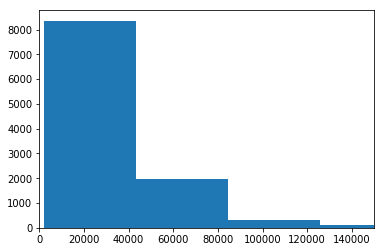

Populating the interactive namespace from numpy and matplotlib


C:\Users\korin\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


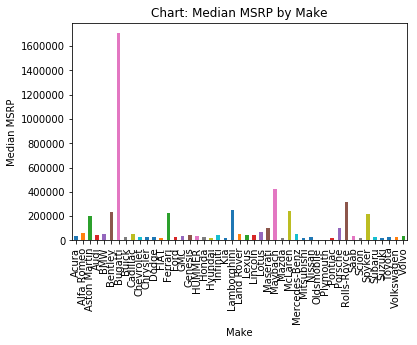

In [193]:
plt.hist(df.source['MSRP'], bins=50)
plt.xlim(0,150000)
plt.show()
%pylab inline
Make = df.source.groupby(['Make'])['MSRP'].median()
Make.plot(kind='bar',stacked=True)
pylab.ylabel('Median MSRP')
pylab.title('Chart: Median MSRP by Make')
plt.show()

In [194]:
df.source = df.source[df.source['MSRP'] < 1_000_000]

In [195]:
df.source = df.source.drop(['Model'], axis = 1)
df.source = df.source.drop(['Engine Cylinders'], axis = 1)
df.source = df.source.drop(['Number of Doors'], axis = 1)
df.source = df.source.drop(['highway MPG'], axis = 1)

In [196]:
max_age = df.source['Year'].max()
df.source['Age'] = max_age - df.source['Year']
df.source.drop("Year", axis = 1, inplace=True)
df.source['Age']  = (df.source['Age'] - df.source['Age'].min())/(df.source['Age'].max() - df.source['Age'].min())

In [197]:
df.source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11097 entries, 0 to 11193
Data columns (total 10 columns):
Make                 11097 non-null object
Engine Fuel Type     11097 non-null object
Engine HP            11097 non-null float64
Transmission Type    11097 non-null object
Driven_Wheels        11097 non-null object
Vehicle Size         11097 non-null object
Vehicle Style        11097 non-null object
city mpg             11097 non-null int64
MSRP                 11097 non-null int64
Age                  11097 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 953.6+ KB


In [198]:
df

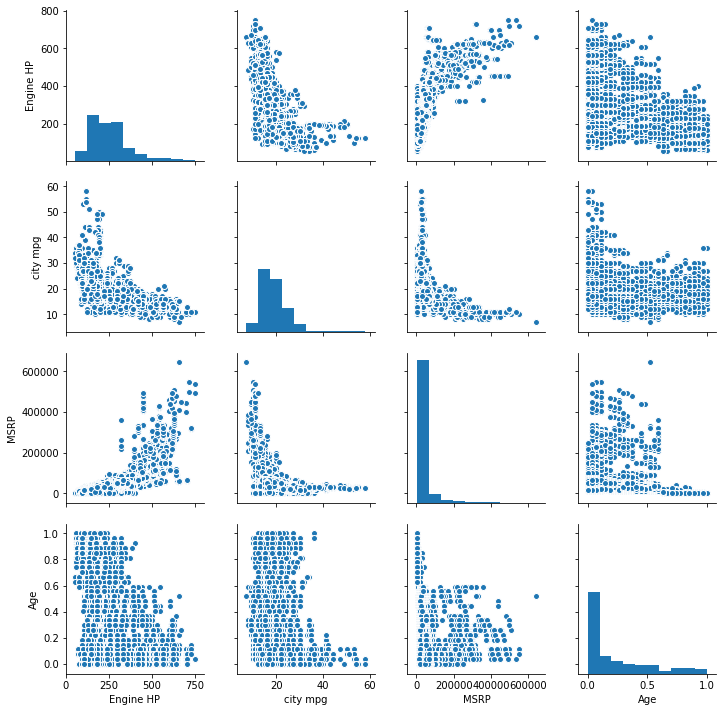

In [199]:
sns.pairplot(df.source)

In [200]:
dummy_Engine_Fuel_Type = pd.get_dummies(df.source["Make"])
df.source = pd.concat([df.source, dummy_Engine_Fuel_Type], axis=1)
df.source.drop("Make", axis = 1, inplace=True)

dummy_Engine_Fuel_Type = pd.get_dummies(df.source["Engine Fuel Type"])
df.source = pd.concat([df.source, dummy_Engine_Fuel_Type], axis=1)
df.source.drop("Engine Fuel Type", axis = 1, inplace=True)

dummy_Transmission_Type = pd.get_dummies(df.source["Transmission Type"])
df.source = pd.concat([df.source, dummy_Transmission_Type], axis=1)
df.source.drop("Transmission Type", axis = 1, inplace=True)

dummy_Driven_Wheels = pd.get_dummies(df.source["Driven_Wheels"])
df.source = pd.concat([df.source, dummy_Driven_Wheels], axis=1)
df.source.drop("Driven_Wheels", axis = 1, inplace=True)

dummy_Engine_Cylinders = pd.get_dummies(df.source["Vehicle Size"])
df.source = pd.concat([df.source, dummy_Engine_Cylinders], axis=1)
df.source.drop("Vehicle Size", axis = 1, inplace=True)

dummy_Engine_Cylinders = pd.get_dummies(df.source["Vehicle Style"])
df.source = pd.concat([df.source, dummy_Engine_Cylinders], axis=1)
df.source.drop("Vehicle Style", axis = 1, inplace=True)

In [201]:
df.source['city-L/100km'] = 235/df.source["city mpg"]
df.source.drop("city mpg", axis = 1, inplace=True)

df.source['city-L/100km'] = (df.source['city-L/100km'] - df.source['city-L/100km'].min())/(df.source['city-L/100km'].max() - df.source['city-L/100km'].min())
df.source['Engine HP'] = (df.source['Engine HP'] - df.source['Engine HP'].min())/(df.source['Engine HP'].max() - df.source['Engine HP'].min())

df.source

,Engine HP,MSRP,Age,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,...,Convertible SUV,Coupe,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon,city-L/100km
0,0.402878,46135,0.222222,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.281734
1,0.352518,40650,0.222222,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.281734
2,0.352518,36350,0.222222,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.260784
3,0.251799,29450,0.222222,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.305011
4,0.251799,34500,0.222222,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.305011
5,0.251799,31200,0.185185,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.305011
6,0.352518,44100,0.185185,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.331027
7,0.352518,39300,0.185185,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.260784
8,0.251799,36900,0.185185,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.305011
9,0.251799,37200,0.148148,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.305011


In [202]:
# df['Number of Doors'].unique()
df.source.corr()

,Engine HP,MSRP,Age,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,...,Convertible SUV,Coupe,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon,city-L/100km
Engine HP,1.000000,0.733626,-0.341284,-0.011483,-0.003166,0.191680,0.042150,0.123439,0.210261,-0.040191,...,-0.053849,0.240903,0.109725,-0.019976,-0.064164,0.006529,-0.050579,-0.051917,-0.107545,0.602600
MSRP,0.733626,1.000000,-0.263033,-0.018048,0.008734,0.286156,0.046704,0.073671,0.338370,-0.031829,...,-0.023274,0.213410,-0.019441,-0.086135,-0.056591,-0.022072,-0.083325,-0.010590,-0.069026,0.446322
Age,-0.341284,-0.263033,1.000000,0.008757,-0.013831,-0.029658,-0.046858,-0.086307,-0.011552,0.002251,...,0.060281,0.053735,-0.093100,0.076086,0.072402,-0.018754,0.124949,-0.020904,0.057296,0.253787
Acura,-0.011483,-0.018048,0.008757,1.000000,-0.003197,-0.013691,-0.025987,-0.025945,-0.012337,-0.019873,...,-0.007573,-0.011871,-0.037680,-0.035903,-0.028506,-0.015809,-0.026971,0.085529,-0.017794,-0.050003
Alfa Romeo,-0.003166,0.008734,-0.013831,-0.003197,1.000000,-0.001931,-0.003664,-0.003659,-0.001740,-0.002802,...,-0.001068,0.034172,-0.005313,-0.005063,-0.004020,-0.002229,-0.003803,-0.012357,-0.004881,-0.021035
Aston Martin,0.191680,0.286156,-0.029658,-0.013691,-0.001931,1.000000,-0.015694,-0.015669,-0.007450,-0.012001,...,-0.004573,0.124884,-0.022755,-0.021682,-0.017215,-0.009547,-0.016288,-0.036835,-0.020903,0.154045
Audi,0.042150,0.046704,-0.046858,-0.025987,-0.003664,-0.015694,1.000000,-0.029741,-0.014141,-0.022780,...,-0.008681,0.007222,-0.043192,-0.041154,-0.032676,-0.018122,-0.030916,0.090001,0.021886,-0.029879
BMW,0.123439,0.073671,-0.086307,-0.025945,-0.003659,-0.015669,-0.029741,1.000000,-0.014119,-0.022743,...,-0.008667,0.051236,-0.043122,-0.041088,-0.032624,-0.018092,-0.030867,0.034714,-0.024815,-0.025179
Bentley,0.210261,0.338370,-0.011552,-0.012337,-0.001740,-0.007450,-0.014141,-0.014119,1.000000,-0.010814,...,-0.004121,0.061956,-0.020504,-0.019537,-0.015512,-0.008603,-0.014677,0.015981,-0.018835,0.184704
Buick,-0.040191,-0.031829,0.002251,-0.019873,-0.002802,-0.012001,-0.022780,-0.022743,-0.010814,1.000000,...,-0.006638,-0.024984,-0.033029,-0.031471,0.016819,-0.013858,-0.023642,0.076571,-0.017615,-0.011073


In [203]:
targets = df.source['MSRP'].astype('float')
df.source = df.source.drop(labels=['MSRP'], axis = 1)
#print('Practical data: \n', data_dropped.iloc[:4, :6])
df.source.head()

,Engine HP,Age,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,...,Convertible SUV,Coupe,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon,city-L/100km
0,0.402878,0.222222,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.281734
1,0.352518,0.222222,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.281734
2,0.352518,0.222222,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.260784
3,0.251799,0.222222,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.305011
4,0.251799,0.222222,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.305011


In [204]:
numeric = df.source.describe().columns
dataset_num = df.source[numeric]
X_train, X_test, y_train, y_test = train_test_split(dataset_num, targets, test_size=0.2, random_state=0)
# Create classifier
lr = LinearRegression()
# Fit classifier
lr = lr.fit(X_train, y_train)
# Predict on test data
y_pred = lr.predict(X_test)
# Get accuracy score
mean_squared_error(y_test,y_pred), mean_absolute_error(y_test,y_pred)

(254062012.19324324, 9048.491441441442)

In [205]:
# Make PCA and transform data
pca = PCA(n_components=84, random_state=2)
T = pca.fit_transform(df.source)
T = pd.DataFrame(T)
# plot the data
# T.columns = ['PCA component 1', 'PCA component 2']
# T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
#         alpha=0.7, # opacity
#         title="red: ckd, green: not-ckd" )
# plt.show()

In [206]:
X_train, X_test, y_train, y_test = train_test_split(T, targets, test_size=0.2, random_state=0)
# Create classifier
lr = LinearRegression()
# Fit classifier
lr = lr.fit(X_train, y_train)
# Predict on test data
y_pred = lr.predict(X_test)
# Get accuracy score
mean_squared_error(y_test,y_pred), mean_absolute_error(y_test,y_pred)

(254799601.66102558, 9020.470150603345)